Importación de librerías necesarias

In [46]:
from Preprocessing import CleanData as cd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB,MultinomialNB,ComplementNB,BernoulliNB,CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

Preproceso
- Importación de los datos del dataset
- Mostrar las primeras y últimas filas del dataframe importado
- Mostrar parámetros estadísticos de los datos (media, desviación típica, cuartiles, etc.)
- Mostrar un mapa de calor que indique la correlación entre variables
- Seleccionar las características a tener en cuenta en el estudio
- Separar datos entre datos de entrada y etiquetas (resultados)
- Separar datos entre entrenamiento y prueba (usando un 75% para entrenamiento y 25% para test)

In [47]:
heart_df = pd.read_csv('heart.csv')
print('#'*5,'HEART TOP 5','#'*5)
heart_df.head(5)




##### HEART TOP 5 #####


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [48]:
print('#'*5,'HEART LAST 5','#'*5)
heart_df.tail(5)

##### HEART LAST 5 #####


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [49]:
wine_df = pd.read_csv('WineQT.csv')
print('#'*5,'WINE TOP 5','#'*5)
wine_df.head(5)

##### WINE TOP 5 #####


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [50]:
print('#'*5,'WINE LAST 5','#'*5)
wine_df.tail(5)

##### WINE LAST 5 #####


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [51]:
print('#'*5,'HEART STATS','#'*5)
heart_df.describe()


##### HEART STATS #####


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [52]:
print('#'*5,'WINE STATS','#'*5)
wine_df.describe()

##### WINE STATS #####


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


##### HEART HEATMAP #####


C:\Users\mateo\AppData\Local\Temp\ipykernel_38368\2755685585.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(heart_df.corr(),square=True,annot=True,linewidths=.5)


<AxesSubplot: >

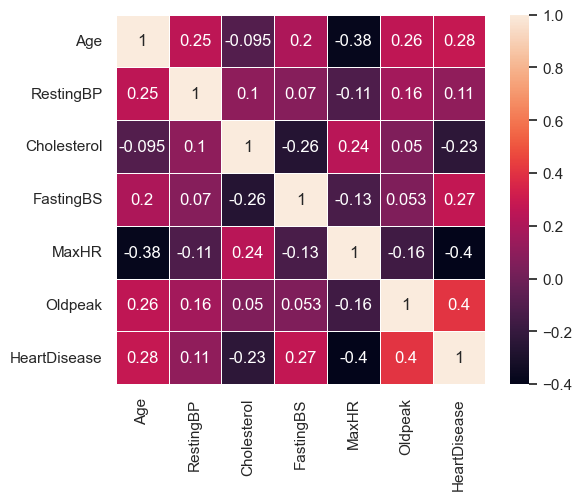

In [53]:
sns.set()
print('#'*5,'HEART HEATMAP','#'*5)
sns.heatmap(heart_df.corr(),square=True,annot=True,linewidths=.5)

##### WINE HEATMAP #####


<AxesSubplot: >

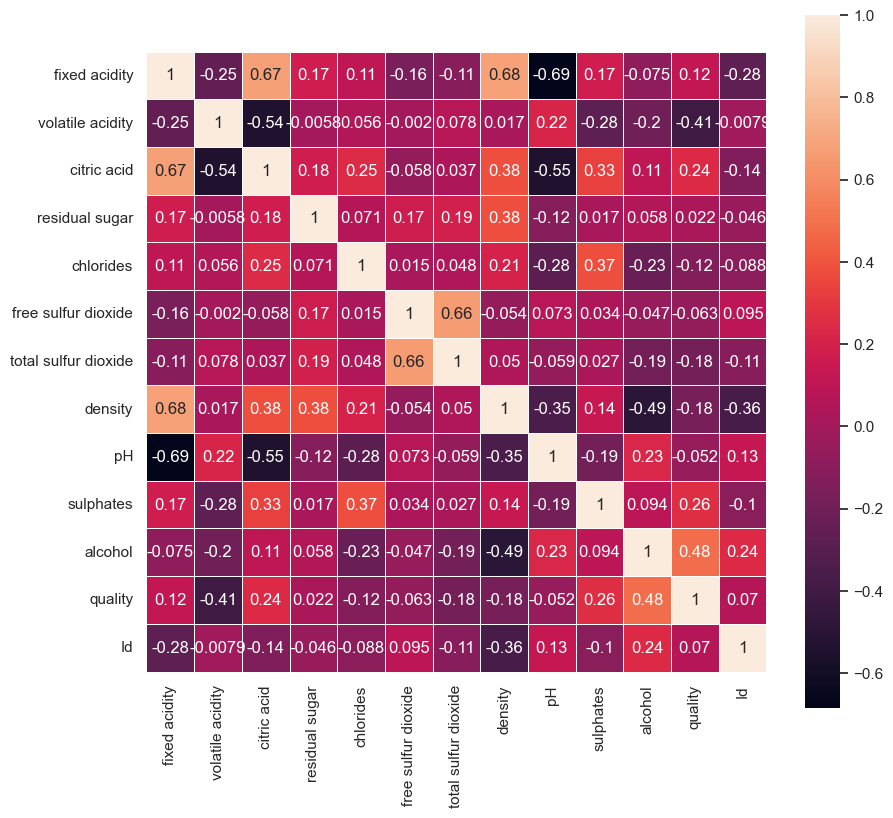

In [54]:
print('#'*5,'WINE HEATMAP','#'*5)
plt.figure(figsize=(10, 9))
sns.heatmap(wine_df.corr(),square=True,annot=True,linewidths=0.5)

In [55]:
heart_df = cd.clean(heart_df)
heart_df = cd.transform_categorical_to_numeric(heart_df)

# Se borran los valores negativos ya que no tienen sentido segun la documentacion del dataset
heart_df.drop(heart_df[heart_df.oldpeak < 0].index, inplace=True)
heart_df

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [56]:
wine_df = cd.clean(wine_df,drop_columns=['id'])
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


Entrenamiento y predicción
- Elegir, instanciar y entrenar el modelo
- Realizar una predicción con los datos de prueba

In [57]:
print('#'*5,'WINE TRAINING','#'*5)
in_wine_df = wine_df.drop('quality',axis=1)
# Mejora la prediccion al tener un impacto del 0.66% con total sulfur dioxide (mapa de calor)
in_wine_df = in_wine_df.drop('free sulfur dioxide',axis=1)
in_wine_df = in_wine_df.drop('fixed acidity',axis=1)

#in_wine_df = in_wine_df.drop('total sulfur dioxide',axis=1)
out_wine_df = wine_df['quality']
xw_train,xw_test,yw_train,wine_test = train_test_split(in_wine_df,out_wine_df,random_state=1,train_size=0.75)
model = GaussianNB()
model.fit(xw_train,yw_train)
wine_predict = model.predict(xw_test)
example_wine = pd.DataFrame({'volatile acidity':[.1], 'citric acid':[.7], 'residual sugar':[1], 'chlorides':[.4],
       'total sulfur dioxide':[9], 'density':[.66], 'ph':[2], 'sulphates':[.4], 'alcohol':[14]})
example_wine_prediction = model.predict(example_wine)


##### WINE TRAINING #####


In [58]:
print('#'*5,'HEART TRAINING','#'*5)
in_heart_df = heart_df.drop('heartdisease',axis=1)
out_heart_df = heart_df['heartdisease']
xh_train,xh_test,yh_train,heart_test = train_test_split(in_heart_df,out_heart_df,random_state=1,train_size=0.75)
model = GaussianNB()
model.fit(xh_train,yh_train)
heart_predict = model.predict(xh_test)
example_heart = pd.DataFrame({'age':[18], 'sex':[0], 'chestpaintype':[0], 'restingbp':[100], 'cholesterol':[500], 'fastingbs':[0],
       'restingecg':[0], 'maxhr':[120], 'exerciseangina':[0], 'oldpeak':[.7], 'st_slope':[1]})
example_heart_prediction = model.predict(example_heart)

##### HEART TRAINING #####


Evaluación
- Mostrar el porcentaje de elementos correctamente clasificados
- Mostrar la predicción realizada (imprimir la variable con la predicción)
- Representar gráficamente la clasificación obtenida (matriz de confusión)

In [65]:
print('WINE ACCURACY PERCENT:',accuracy_score(wine_test,wine_predict))
print('Custom wine prediction quality:',example_wine_prediction[0],'\ndata:\n',example_wine.T)
print('-'*10)
print('HEART ACCURACY PERCENT:',accuracy_score(heart_test,heart_predict))
print('Custom heart prediction heartdisease:',example_heart_prediction[0],'\ndata:\n',example_heart.T)




WINE ACCURACY PERCENT: 0.40559440559440557
Custom wine prediction quality: 7 
data:
                           0
volatile acidity       0.10
citric acid            0.70
residual sugar         1.00
chlorides              0.40
total sulfur dioxide   9.00
density                0.66
ph                     2.00
sulphates              0.40
alcohol               14.00
----------
HEART ACCURACY PERCENT: 0.8193832599118943
Custom heart prediction heartdisease: 0 
data:
                     0
age              18.0
sex               0.0
chestpaintype     0.0
restingbp       100.0
cholesterol     500.0
fastingbs         0.0
restingecg        0.0
maxhr           120.0
exerciseangina    0.0
oldpeak           0.7
st_slope          1.0


##### WINE CONFUSION MATRIX #####


C:\Users\mateo\AppData\Local\Temp\ipykernel_38368\858338818.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


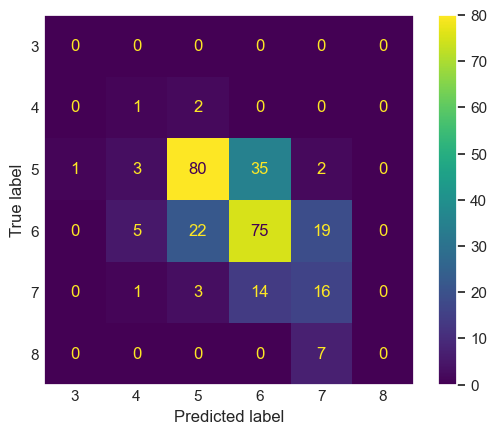

In [60]:
print('#'*5,'WINE CONFUSION MATRIX','#'*5)
ConfusionMatrixDisplay.from_predictions(wine_test,wine_predict)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)

##### HEART CONFUSION MATRIX #####


C:\Users\mateo\AppData\Local\Temp\ipykernel_38368\135789203.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


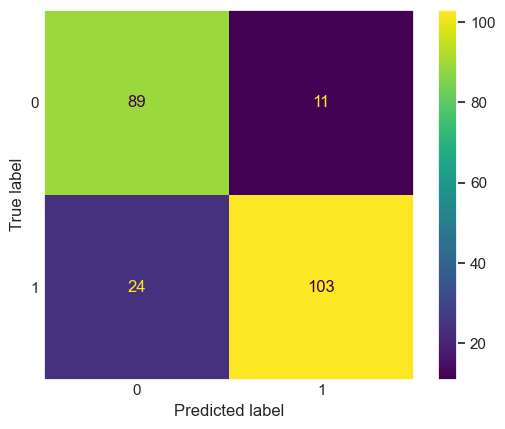

In [61]:
print('#'*5,'HEART CONFUSION MATRIX','#'*5)
ConfusionMatrixDisplay.from_predictions(heart_test,heart_predict)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)

Optimización (probar el proceso con distintos clasificadores)
- Finalmente prueba los distintos clasificadores y realiza una pequeña comparativa indicando cuál obtiene mejores resultados.

In [62]:
print('MultinomialNB')
model = MultinomialNB()
model.fit(xw_train,yw_train)
wine_predict = model.predict(xw_test)

model = MultinomialNB()
model.fit(xh_train,yh_train)
heart_predict = model.predict(xh_test)

print('WINE PERCENT',accuracy_score(wine_test,wine_predict))
print('HEART PERCENT',accuracy_score(heart_test,heart_predict))

MultinomialNB
WINE PERCENT 0.506993006993007
HEART PERCENT 0.6123348017621145


Con MultinomialNB la prediccion del vino es mejor.
Al contrario con el corazon la prediccion es peor.

In [63]:
print('ComplementNB')
model = ComplementNB()
model.fit(xw_train,yw_train)
wine_predict = model.predict(xw_test)

model = ComplementNB()
model.fit(xh_train,yh_train)
heart_predict = model.predict(xh_test)

print('WINE PERCENT',accuracy_score(wine_test,wine_predict))
print('HEART PERCENT',accuracy_score(heart_test,heart_predict))

ComplementNB
WINE PERCENT 0.5104895104895105
HEART PERCENT 0.6255506607929515


Con ComplementNB la prediccion del vino es similar a la de ComplementNB.
Con el corazon la prediccion tiene una minima mejoria y sigue siendo peor.

In [64]:
print('BernoulliNB')
model = BernoulliNB()
model.fit(xw_train,yw_train)
wine_predict = model.predict(xw_test)

model = BernoulliNB()
model.fit(xh_train,yh_train)
heart_predict = model.predict(xh_test)

print('WINE PERCENT',accuracy_score(wine_test,wine_predict))
print('HEART PERCENT',accuracy_score(heart_test,heart_predict))

BernoulliNB
WINE PERCENT 0.40559440559440557
HEART PERCENT 0.8193832599118943


Con BernoulliNB la prediccion del vino es similar a la de GaussianNB.
En el caso del corazon la prediccion tambien es igual a GaussianNB.